<h2 style='color:purple' align='center'>Fashion classification</h2>

Let us classify the fashion into one of the 10 labels using 
1. A simple NN which has only input and output layers. 
2. NN with one hidden layer.
3. NN with two hidden layers.

and see how the performance of the model improves

<img src="problem.png" height=400 width=400/>

In [232]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### TensorFlow Installation

In [233]:
#!pip install tensorflow

In [234]:
import tensorflow as tf

In [235]:
print(tf.version.VERSION)

2.7.0


#### Import the necessary libraries

In [236]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [237]:
keras.backend.backend()

'tensorflow'

#### Load and split the data into training and testing set

In [238]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

#### Explore the dataset

Keras Fashion MNIST dataset

<img src="dataset.png" height=400 width=400/>

In [239]:
len(X_train)

60000

In [240]:
len(X_test)

10000

In [241]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='pixel.png' height=300 width=300/>

In [242]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

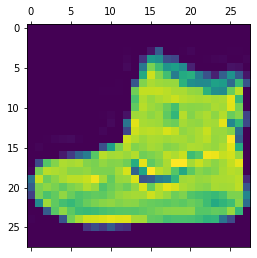

In [243]:
plt.matshow(X_train[0])

In [244]:
y_train[0]
# Label for the above input image

9

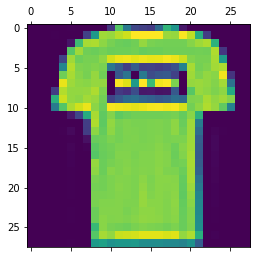

In [245]:
plt.matshow(X_train[1])

In [246]:
y_train[1]

0

In [247]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

#### Flattening

In [248]:
X_train.shape

(60000, 28, 28)

In [249]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [250]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [251]:
X_train_flattened.shape

(60000, 784)

In [252]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [253]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<h3 style='color:purple'>1. Very simple neural network with no hidden layers</h3>

<img src="model1.jpg" height=700 width=700/>

##### Model configuration

In [254]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

##### Model summary

In [255]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [256]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [257]:
model1.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 797us/step - loss: 16.2090 - accuracy: 0.7508
Epoch 2/5
1875/1875 [==============================] - 1s 780us/step - loss: 12.0194 - accuracy: 0.7905
Epoch 3/5
1875/1875 [==============================] - 1s 789us/step - loss: 11.4145 - accuracy: 0.7955
Epoch 4/5
1875/1875 [==============================] - 1s 794us/step - loss: 10.8740 - accuracy: 0.7989
Epoch 5/5
1875/1875 [==============================] - 1s 790us/step - loss: 10.9176 - accuracy: 0.8028


###### Normalize the input dataset

In [258]:
X_train_normalized = X_train_flattened / 255

In [259]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [260]:
model1.fit(X_train_normalized, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1017 - accuracy: 0.7645
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8096 - accuracy: 0.7996
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6590 - accuracy: 0.8044
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5665 - accuracy: 0.8166
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5027 - accuracy: 0.8331


###### Testing the model

In [261]:
X_test_normalized = X_test_flattened / 255

In [262]:
model1.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 681us/step - loss: 0.5080 - accuracy: 0.8265


[0.5079659223556519, 0.8264999985694885]

Predicted probabilities for each class label on each sample in the test set

In [263]:
model1.predict(X_test_normalized)

array([[8.51464272e-03, 2.52544880e-03, 1.04825884e-01, ...,
        9.75169539e-01, 7.53200650e-01, 9.86341238e-01],
       [1.02339089e-02, 1.67161226e-04, 9.52941060e-01, ...,
        1.83271733e-13, 2.07462907e-03, 4.94304793e-08],
       [7.02525377e-01, 9.99905169e-01, 3.43355954e-01, ...,
        1.02287049e-05, 7.61884451e-03, 6.04271889e-04],
       ...,
       [6.97684765e-01, 3.50263715e-03, 1.37048453e-01, ...,
        3.07799578e-02, 9.29696858e-01, 7.79861212e-03],
       [3.31238449e-01, 9.98944163e-01, 2.16218382e-01, ...,
        7.90387392e-04, 8.93759727e-03, 4.69608009e-02],
       [4.05592322e-02, 3.45466435e-02, 2.43292630e-01, ...,
        9.16267335e-01, 5.52341402e-01, 3.82515788e-01]], dtype=float32)

Let us predict for the first image in the testing set

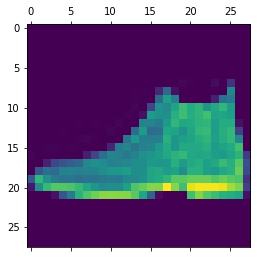

In [264]:
plt.matshow(X_test[0])

In [265]:
y_predicted = model1.predict(X_test_normalized)

In [266]:
y_predicted[0]
# Displays the probability score for each class label. 

array([0.00851464, 0.00252545, 0.10482588, 0.02123681, 0.10059053,
       0.9543059 , 0.10626543, 0.97516954, 0.75320065, 0.98634124],
      dtype=float32)

In [267]:
prediction = np.argmax(y_predicted[0])
prediction

9

In [268]:
class_labels[prediction] 

'Ankle boot'

Let us predict for the second image in the testing set

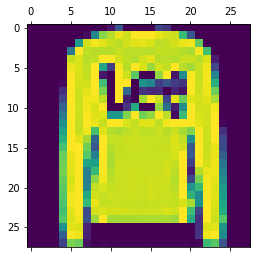

In [269]:
plt.matshow(X_test[1])

In [270]:
y_predicted[1]

array([1.0233909e-02, 1.6716123e-04, 9.5294106e-01, 7.3733926e-04,
       4.2614385e-01, 1.2150873e-09, 6.4252037e-01, 1.8327173e-13,
       2.0746291e-03, 4.9430479e-08], dtype=float32)

In [271]:
prediction = np.argmax(y_predicted[1])
prediction

2

In [272]:
class_labels[prediction] 

'Pullover'

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [273]:
y_predicted[:5]

array([[8.51464272e-03, 2.52544880e-03, 1.04825884e-01, 2.12368071e-02,
        1.00590527e-01, 9.54305887e-01, 1.06265426e-01, 9.75169539e-01,
        7.53200650e-01, 9.86341238e-01],
       [1.02339089e-02, 1.67161226e-04, 9.52941060e-01, 7.37339258e-04,
        4.26143855e-01, 1.21508725e-09, 6.42520368e-01, 1.83271733e-13,
        2.07462907e-03, 4.94304793e-08],
       [7.02525377e-01, 9.99905169e-01, 3.43355954e-01, 7.59513974e-01,
        6.61313295e-01, 2.38518987e-06, 1.78817868e-01, 1.02287049e-05,
        7.61884451e-03, 6.04271889e-04],
       [4.59885418e-01, 9.99760926e-01, 3.96330178e-01, 9.18001175e-01,
        5.54064989e-01, 8.15980020e-05, 2.04250336e-01, 1.79845465e-05,
        5.61666489e-03, 7.29605556e-03],
       [3.42520475e-01, 6.20630383e-03, 4.14115548e-01, 4.21195924e-02,
        1.62012935e-01, 1.07752458e-05, 6.61450267e-01, 3.09643866e-08,
        1.77998543e-02, 8.74964753e-05]], dtype=float32)

In [274]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [275]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[820,   5,  10,  45,   7,   4,  93,   0,  16,   0],
       [  6, 944,  14,  28,   5,   0,   1,   0,   2,   0],
       [ 17,   3, 690,   7, 189,   0,  88,   0,   6,   0],
       [ 33,  11,   8, 844,  49,   0,  52,   0,   3,   0],
       [  0,   2,  84,  30, 812,   0,  67,   0,   5,   0],
       [  0,   1,   0,   0,   0, 884,   0,  79,   3,  33],
       [177,   2, 133,  32, 158,   0, 473,   0,  25,   0],
       [  0,   0,   0,   0,   0,  23,   0, 937,   0,  40],
       [  2,   1,   7,  12,   3,   7,  25,   8, 935,   0],
       [  0,   0,   0,   0,   0,  14,   0,  59,   1, 926]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

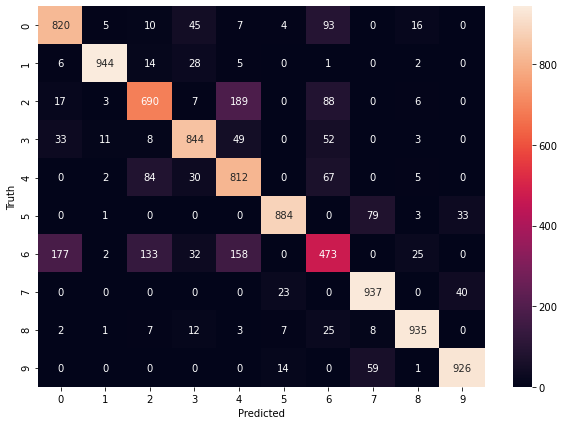

In [276]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>2. NN model with one hidden layer</h3> 

Adding layers should improve the performance

<img src="model2.png" height=400 width=400/>

###### Model configuration

In [277]:
model2 = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')
])

##### Model summary

In [278]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [279]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [280]:
model2.fit(X_train_normalized, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.5280 - accuracy: 0.8163
Epoch 2/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.4000 - accuracy: 0.8575
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3607 - accuracy: 0.8700
Epoch 4/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.3367 - accuracy: 0.8774
Epoch 5/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.3175 - accuracy: 0.8847


###### Testing the model

In [281]:
model2.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 749us/step - loss: 0.3755 - accuracy: 0.8683


[0.3755129873752594, 0.8683000206947327]

Let us predict for the first image in the testing set

In [282]:
model2.predict(X_test_normalized)

array([[8.68794322e-03, 2.51539404e-05, 2.46763229e-04, ...,
        9.72563148e-01, 1.15905136e-01, 9.97936726e-01],
       [5.44160128e-01, 1.28377378e-02, 9.99978900e-01, ...,
        1.13240546e-07, 5.57835400e-02, 7.61111139e-12],
       [6.01077974e-01, 9.99999702e-01, 4.94730473e-03, ...,
        1.06394971e-09, 1.42191648e-02, 4.84287321e-09],
       ...,
       [4.33955699e-01, 2.15834316e-05, 2.81053782e-01, ...,
        5.19335270e-04, 9.99161899e-01, 1.89197854e-05],
       [3.07150781e-02, 9.99981165e-01, 2.23964453e-03, ...,
        3.90527020e-05, 2.43235916e-01, 9.54747200e-04],
       [2.99571157e-02, 4.83483054e-05, 1.16804540e-02, ...,
        3.94434392e-01, 1.83159530e-01, 6.84285164e-03]], dtype=float32)

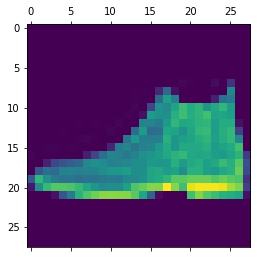

In [283]:
plt.matshow(X_test[0])

In [284]:
y_predicted = model2.predict(X_test_normalized)

In [285]:
y_predicted[0]
# Displays the probability score for each class label. 

array([8.68794322e-03, 2.51539404e-05, 2.46763229e-04, 1.15018902e-05,
       3.95685434e-04, 9.79633510e-01, 2.95692682e-03, 9.72563148e-01,
       1.15905136e-01, 9.97936726e-01], dtype=float32)

In [286]:
prediction = np.argmax(y_predicted[0])
prediction

9

In [287]:
class_labels[prediction] 

'Ankle boot'

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [288]:
y_predicted[:5]

array([[8.68794322e-03, 2.51539404e-05, 2.46763229e-04, 1.15018902e-05,
        3.95685434e-04, 9.79633510e-01, 2.95692682e-03, 9.72563148e-01,
        1.15905136e-01, 9.97936726e-01],
       [5.44160128e-01, 1.28377378e-02, 9.99978900e-01, 1.68039203e-02,
        9.95084643e-01, 8.34752178e-09, 9.80251551e-01, 1.13240546e-07,
        5.57835400e-02, 7.61111139e-12],
       [6.01077974e-01, 9.99999702e-01, 4.94730473e-03, 7.46198893e-02,
        8.95213485e-02, 3.27866218e-07, 1.29135847e-02, 1.06394971e-09,
        1.42191648e-02, 4.84287321e-09],
       [1.27917588e-01, 9.99998689e-01, 1.42499506e-02, 8.67629886e-01,
        1.09834582e-01, 6.22119933e-06, 1.46686733e-02, 8.21765482e-08,
        2.16115415e-02, 3.00359943e-06],
       [9.42528725e-01, 2.25526094e-03, 8.08256149e-01, 3.13519835e-01,
        2.26850599e-01, 4.39673662e-04, 9.67166543e-01, 4.35141992e-05,
        1.12691849e-01, 1.13607312e-04]], dtype=float32)

In [289]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [290]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[892,   4,  20,  23,   2,   4,  47,   0,   8,   0],
       [  1, 975,   1,  19,   3,   0,   1,   0,   0,   0],
       [ 15,  14, 870,  10,  70,   0,  20,   0,   1,   0],
       [ 32,  18,  19, 880,  29,   0,  18,   0,   4,   0],
       [  0,   7, 179,  38, 748,   0,  27,   0,   1,   0],
       [  1,   0,   0,   1,   0, 971,   0,  13,   2,  12],
       [177,  14, 169,  31,  84,   0, 515,   0,  10,   0],
       [  0,   0,   0,   0,   0,  50,   0, 929,   0,  21],
       [  5,   5,  11,   3,   5,   8,   6,   2, 955,   0],
       [  0,   0,   0,   0,   0,  17,   1,  34,   0, 948]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

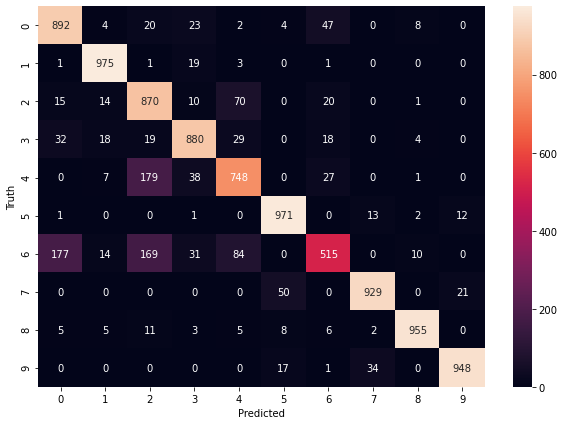

In [291]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>3. NN model with two hidden layers</h3> 

Adding layers should improve the performance

<img src="model3.png" height=400 width=400/>

Include flattening layer instead of manual flattening

###### Model configuration

In [292]:
model3 = keras.Sequential([
    # input layer with 784 neurons 
    keras.layers.Flatten(input_shape=(28,28)),
    # first hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # second hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # Output layer with 10 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

##### Model summary

In [293]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [294]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [295]:
X_train_Norm = X_train / 255
X_test_Norm = X_test / 255
# we did not flatten separately

In [296]:
model3.fit(X_train_Norm, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5151 - accuracy: 0.8165
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3754 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3443 - accuracy: 0.8722
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3192 - accuracy: 0.8810
Epoch 5/5
1875/1875 [==============================] - 2s 991us/step - loss: 0.3029 - accuracy: 0.8871


###### Testing the model

In [297]:
model3.evaluate(X_test_Norm, y_test)

313/313 [==============================] - 0s 750us/step - loss: 0.3424 - accuracy: 0.8765


[0.34238743782043457, 0.8765000104904175]

Let us predict for the first image in the testing set

In [298]:
model3.predict(X_test_Norm)

array([[2.5003731e-02, 2.4217367e-04, 2.2208989e-03, ..., 9.7786981e-01,
        9.7036362e-03, 9.9951369e-01],
       [7.3662835e-01, 2.2036556e-05, 9.9997115e-01, ..., 7.0223760e-09,
        1.2198091e-03, 1.4398803e-06],
       [4.3732327e-01, 9.9999988e-01, 2.1146625e-02, ..., 1.5537365e-05,
        3.9964914e-04, 3.5038793e-06],
       ...,
       [5.9283966e-01, 3.6722720e-03, 2.1868709e-01, ..., 4.0910607e-05,
        9.8566318e-01, 1.8705856e-05],
       [1.3792327e-01, 9.9997902e-01, 3.5930276e-03, ..., 1.3065636e-03,
        5.2982010e-05, 2.5824904e-03],
       [3.9903671e-02, 8.9037418e-04, 2.1075666e-02, ..., 6.4450479e-01,
        1.3930261e-01, 2.8464049e-02]], dtype=float32)

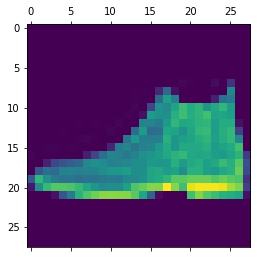

In [299]:
plt.matshow(X_test[0])

In [300]:
y_predicted = model3.predict(X_test_Norm)

In [301]:
y_predicted[0]
# Displays the probability score for each class label. 

array([2.5003731e-02, 2.4217367e-04, 2.2208989e-03, 2.9215217e-04,
       1.6341299e-02, 9.2371237e-01, 8.5530579e-03, 9.7786981e-01,
       9.7036362e-03, 9.9951369e-01], dtype=float32)

In [302]:
prediction = np.argmax(y_predicted[0])
prediction

9

In [303]:
class_labels[prediction] 

'Ankle boot'

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [304]:
y_predicted[:5]

array([[2.5003731e-02, 2.4217367e-04, 2.2208989e-03, 2.9215217e-04,
        1.6341299e-02, 9.2371237e-01, 8.5530579e-03, 9.7786981e-01,
        9.7036362e-03, 9.9951369e-01],
       [7.3662835e-01, 2.2036556e-05, 9.9997115e-01, 1.6802549e-04,
        7.5813460e-01, 4.4348836e-04, 9.2764157e-01, 7.0223760e-09,
        1.2198091e-03, 1.4398803e-06],
       [4.3732327e-01, 9.9999988e-01, 2.1146625e-02, 5.5114031e-02,
        9.0836644e-02, 2.0917732e-08, 8.7133050e-04, 1.5537365e-05,
        3.9964914e-04, 3.5038793e-06],
       [4.5144469e-01, 9.9999762e-01, 7.7247739e-02, 6.9821930e-01,
        3.3463705e-01, 2.7303014e-07, 1.0751098e-02, 3.9675883e-06,
        1.5792251e-04, 5.3797135e-06],
       [9.2150044e-01, 1.3791025e-03, 6.9875991e-01, 1.3331887e-01,
        2.5815374e-01, 2.3954779e-02, 9.7550213e-01, 4.6029687e-04,
        2.4860203e-02, 2.3285747e-03]], dtype=float32)

In [305]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [306]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[855,   1,  36,  18,   1,   1,  85,   0,   3,   0],
       [  2, 973,   1,  17,   4,   0,   3,   0,   0,   0],
       [  9,   0, 870,   9,  67,   0,  43,   0,   2,   0],
       [ 32,  13,  19, 884,  28,   0,  21,   0,   3,   0],
       [  0,   1, 166,  34, 751,   0,  48,   0,   0,   0],
       [  0,   0,   0,   0,   0, 970,   0,  19,   1,  10],
       [166,   1, 136,  24,  67,   0, 599,   0,   7,   0],
       [  0,   0,   0,   0,   0,  22,   0, 953,   0,  25],
       [  4,   1,   7,   6,   2,   2,   8,   5, 965,   0],
       [  0,   0,   0,   0,   0,   9,   1,  45,   0, 945]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

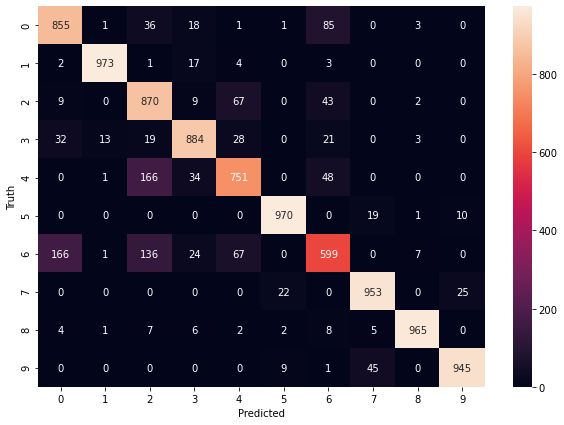

In [307]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')